In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd

# Load the Karate graph

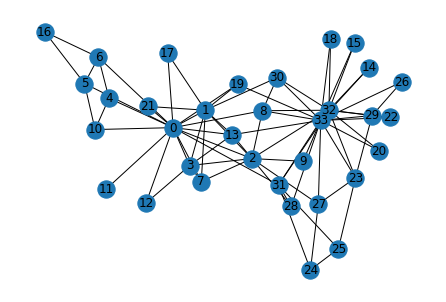

In [2]:
# Load the graph
G_karate = nx.karate_club_graph()
# Find key-values for the graph
pos = nx.spring_layout(G_karate)
# Plot the graph
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

# print information of the graph

In [3]:
n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print("Number of nodes :", str(n))
print("Number of edges :", str(m))
print("Number of connected components :" ,str(nx.number_connected_components(G_karate)))


Number of nodes : 34
Number of edges : 78
Number of connected components : 1


# print the graph itself

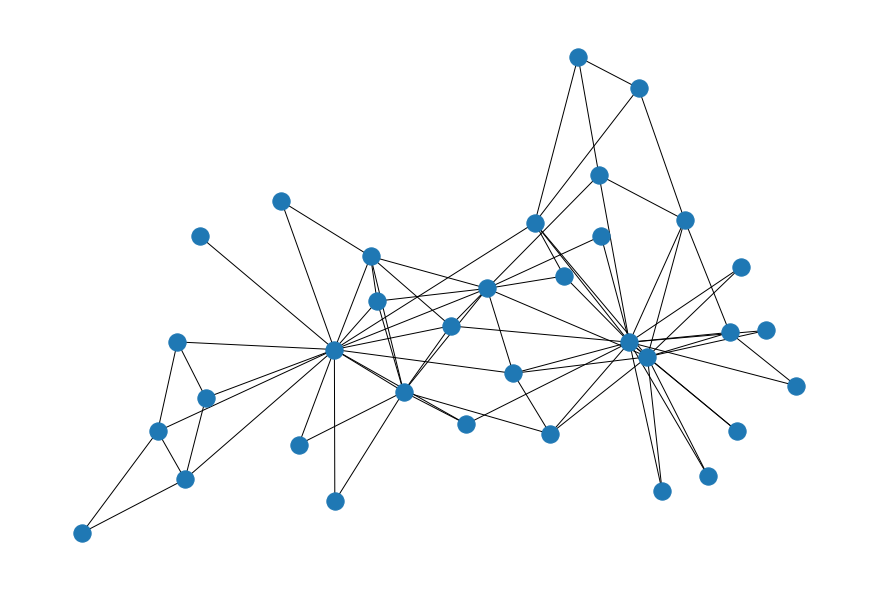

In [4]:
plt.figure(figsize=(12,8))
nx.draw(G_karate)

# make 25% of the edge as subset,and remove it from the train_graph

In [5]:
# Take a random sample of edges
edge_subset = random.sample(G_karate.edges(), int(0.25 * G_karate.number_of_edges()))
# Remove some edges
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)

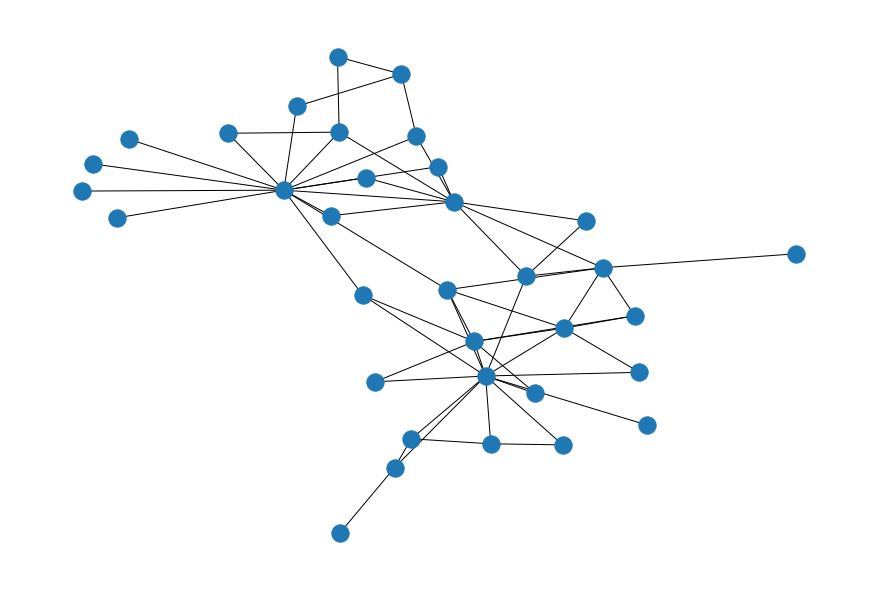

In [6]:
#plot the train graph 
plt.figure(figsize=(12,8))
nx.draw(G_karate_train)

# print the edge information

In [7]:
edge_subset_size = len(list(edge_subset))
print("Deleted : ", str(edge_subset_size))
print("Remaining : ", str((m - edge_subset_size)))

Deleted :  19
Remaining :  59


# Jaccard Coefficient

In [23]:
prediction_jaccard = list(nx.jaccard_coefficient(G_karate_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

In [14]:
# create a dataframe,and draw the roc curve
def get_df(score,label):
    df=pd.DataFrame({'score':list(score),'label':list(label)})
    df['label']=df['label'].apply(lambda x: int(x))
    return df

Jaccard_df=get_df(score,label)
Jaccard_df

,score,label
0,0.187500,1
1,0.142857,1
2,0.000000,0
3,0.000000,0
4,0.000000,0
...,...,...
497,0.222222,1
498,0.000000,0
499,0.250000,0
500,0.066667,1


### define a function for plotting the roc curve

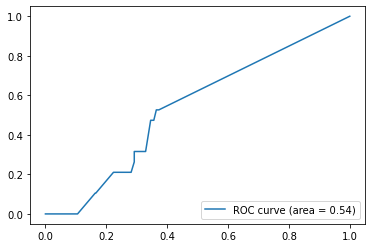

In [53]:
# start to paint the roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
def plot_roc(df):
    # calculate the FPR(false positive) and Recall(real positive)
    FPR,recall,thresholds = roc_curve(df['label'],df['score'])
    # calculate the area of the AUC
    area=AUC(df['label'],df['score'])
    # plot roc curve
    plt.figure()
    plt.plot(FPR,recall,label='ROC curve (area = %0.2f)'%area)
    plt.legend(loc='lower right')
    plt.show()

plot_roc(Jaccard_df)

# Adamic-Adar

In [54]:
prediction_adamic = list(nx.adamic_adar_index(G_karate_train))
score, label = zip(*[(s, (u,v) in edge_subset) \
                    for (u,v,s) in prediction_adamic])

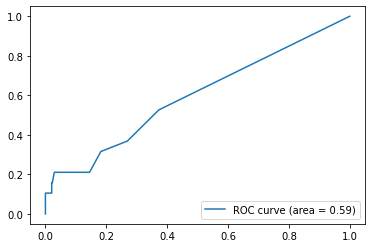

In [55]:
Adamic_Adar_df=get_df(score,label)
plot_roc(Adamic_Adar_df)

# Preferential Attachment

In [57]:
prediction_pref = list(nx.preferential_attachment(G_karate_train))
score, label = zip(*[(s, (u,v) in edge_subset) \
                    for (u,v,s) in prediction_pref])

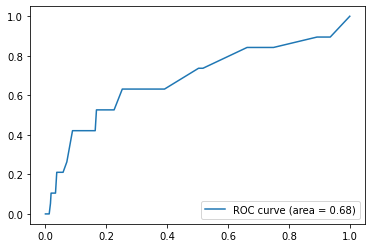

In [58]:
Preferential_df=get_df(score,label)
plot_roc(Preferential_df)